### IMPORT DATASETS

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from scipy.stats import mannwhitneyu
from sklearn.decomposition import SparsePCA

In [4]:
BF_df_CTU = pd.read_feather("BF_df_CTU.feather")
BF_df_OU = pd.read_feather("BF_df_OU.feather")
BF_df_V = pd.read_feather("BF_df_V.feather")
DT_df_CC = pd.read_feather("DT_df_CC.feather")
DT_df_JI = pd.read_feather("DT_df_JI.feather")
IADQ_df = pd.read_feather("IADQ_df.feather")
IESR_df = pd.read_feather("IESR_df.feather")
NAQ_R_df = pd.read_feather("NAQ_R_df.feather")
PCL5_df = pd.read_feather("PCL5_df.feather")
PHQ9_GAD7_df = pd.read_feather("PHQ9_GAD7_df.feather")
PID5_df = pd.read_feather("PID5_df.feather")
PRFQ_df = pd.read_feather("PRFQ_df.feather")
PRMQ_df = pd.read_feather("PRMQ_df.feather")
R_NEO_PI = pd.read_feather("R_NEO_PI.feather")
RAW_DDDT = pd.read_feather("RAW_DDDT.feather")
sPID_5_df = pd.read_feather("sPID-5_df.feather")

In [5]:
dfs = [BF_df_CTU, BF_df_OU, BF_df_V, DT_df_CC, DT_df_JI, IADQ_df, IESR_df, NAQ_R_df, PCL5_df, PHQ9_GAD7_df, PID5_df, PRFQ_df, PRMQ_df, R_NEO_PI, RAW_DDDT, sPID_5_df]

In [6]:
dfs_2 = [BF_df_CTU, BF_df_OU, BF_df_V, DT_df_CC, DT_df_JI, IADQ_df, IESR_df, NAQ_R_df, PCL5_df, PHQ9_GAD7_df, PID5_df, PRFQ_df, PRMQ_df, R_NEO_PI, RAW_DDDT, sPID_5_df]

In [7]:
dfs_names = ['BF_df_CTU', 'BF_df_OU', 'BF_df_V', 'DT_df_CC', 'DT_df_JI', 'IADQ_df', 'IESR_df', 'NAQ_R_df', 'PCL5_df', 'PHQ9_GAD7_df', 'PID5_df', 'PRFQ_df', 'PRMQ_df', 'R_NEO_PI', 'RAW_DDDT', 'sPID-5_df']

In [8]:
for i in dfs:
    i['CONDITION'] = i['CONDITION'].replace(['H', 'D', 'HONEST', 'DISHONEST', 'FAKE'], ['1', '0', '1', '0', '0'])

In [ ]:
for i in dfs_2:
    print(i.shape)

### ACCURACY ON COMPLETE DATASETS

In [ ]:
def complete_ds_acc(dfs, dfs_names, data):
    for i in range(len(dfs)):
        
        X = dfs[i].iloc[:,:-1]
        y = dfs[i].iloc[:,-1]
        center_function = lambda x: x - x.mean()
        X = center_function(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # LOGISTIC REGRESSION
        lr = LogisticRegression(C=0.01, random_state=42)
        lr.fit(X_train, y_train)
        y_lr_pred = lr.predict(X_test)
        acc_lr = accuracy_score(y_test, y_lr_pred)

        # RANDOM FOREST
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train, y_train)
        y_rf_pred = rf.predict(X_test)
        acc_rf = accuracy_score(y_test, y_rf_pred)

        #SVM
        svm = LinearSVC(loss='hinge',random_state=42, max_iter = 100000)
        svm.fit(X_train, y_train)
        y_pred_svm = svm.predict(X_test)
        acc_svm = accuracy_score(y_pred_svm,y_test)

        data[dfs_names[i]] = [acc_lr,acc_rf, acc_svm]

        
    return data

In [ ]:
dic_acc = {}
results_acc_complete = complete_ds_acc(dfs_2, dfs_names, dic_acc)
acc_df_complete = pd.DataFrame(results_acc_complete)
acc_df_complete.round(3)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,BF_df_CTU,BF_df_OU,BF_df_V,DT_df_CC,DT_df_JI,IADQ_df,IESR_df,NAQ_R_df,PCL5_df,PHQ9_GAD7_df,PID5_df,PRFQ_df,PRMQ_df,R_NEO_PI,RAW_DDDT,sPID-5_df
0,0.797,0.841,0.740,0.717,0.665,0.844,0.963,0.977,0.835,0.988,0.972,0.931,0.912,0.907,0.747,0.968
1,0.827,0.877,0.747,0.731,0.608,0.807,0.907,0.958,0.843,0.982,0.972,0.926,0.931,0.914,0.743,0.965
2,0.805,0.826,0.733,0.683,0.662,0.844,0.898,0.972,0.851,0.985,0.931,0.936,0.903,0.907,0.753,0.968


### Mann-Whitney U test

In [ ]:
'''''''''
for i in range(len(dfs)):
    n, p = dfs[i].shape
    print(p-1)
    X_honest = dfs[i][dfs[i]['CONDITION'] == '1'].iloc[:, :-1]
    X_dishonest = dfs[i][dfs[i]['CONDITION'] == '0'].iloc[:, :-1]
    indices = []
    for k in range(0, (p-1)):
        U1, s = mannwhitneyu(X_honest.iloc[:, k], X_dishonest.iloc[:, k])
        if s < 0.001:
            indices.append(k)
    print(len(indices))
    print(' ')
'''''''''

In [9]:
def new_mwu_data(dfs):
    for i in range(len(dfs)):
        n, p = dfs[i].shape
        X_honest = dfs[i][dfs[i]['CONDITION'] == '1'].iloc[:, :-1]
        X_dishonest = dfs[i][dfs[i]['CONDITION'] == '0'].iloc[:, :-1]
        indices = []
        for k in range(0, (p-1)):
            U1, s = mannwhitneyu(X_honest.iloc[:, k], X_dishonest.iloc[:, k])
            if s < 0.01:
                indices.append(k)
        indices.append(-1)
        dfs[i] = dfs[i].iloc[:, indices]

In [10]:
new_mwu_data(dfs)

### PCA - SCREE PLOT

[0.39748301 0.12893974 0.11296775 0.1080606 ]


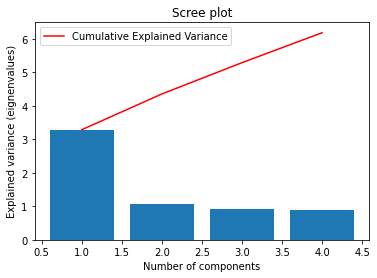

[0.39624166 0.11048968 0.10770575 0.09564024]


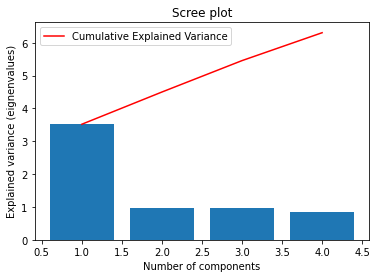

[0.37166334 0.13534112 0.1220554  0.09197146]


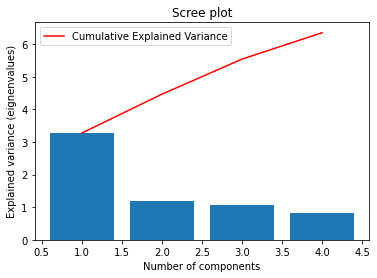

[0.28878065 0.09232819 0.06785913 0.06655424 0.05884848 0.05173098
 0.0470774  0.04169811]


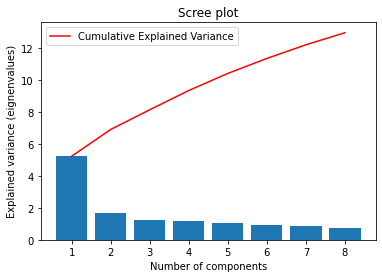

[0.2384934  0.12129226 0.0880753  0.07704757 0.06798819 0.05661258
 0.05315252]


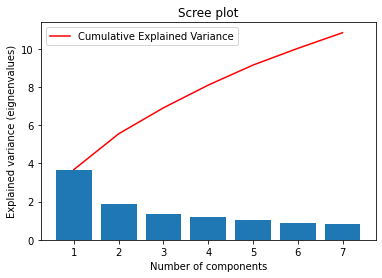

[0.75395626]


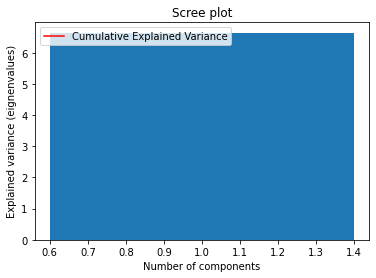

[0.69676974 0.04293427]


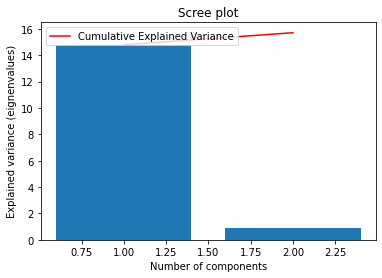

[0.81843485]


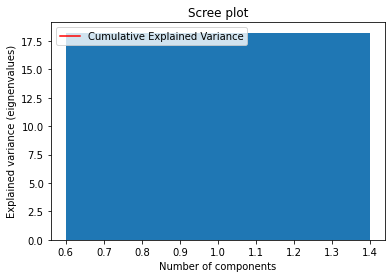

[0.64861171 0.0532745 ]


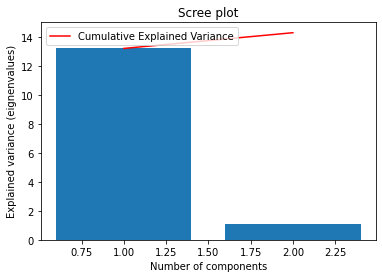

[0.64475237 0.05295358 0.04742983]


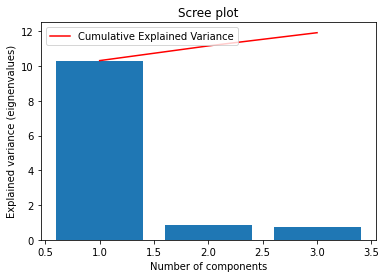

[0.43022183 0.06287053 0.03445997 0.02936224 0.01935438 0.01554887
 0.01363187 0.010884   0.00997885 0.00889428 0.00840469 0.00799334
 0.00752592 0.00688063 0.00660169 0.00615611 0.00584979 0.00574224
 0.00559785 0.00549646]


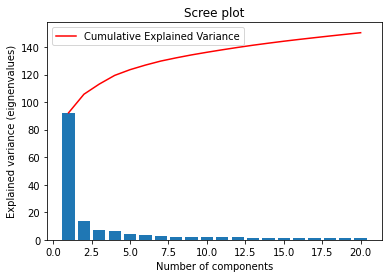

[0.37501157 0.12838091 0.08027796 0.06074724 0.05084903 0.04708708]


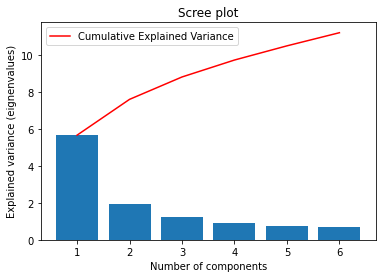

[0.6155774  0.05396152 0.03453545]


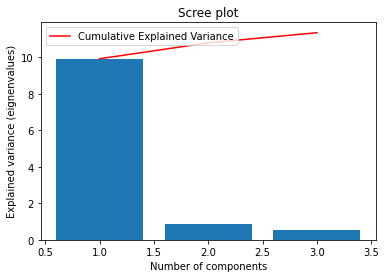

[0.32226713 0.08643513 0.07534942 0.05186969 0.03777571 0.03331391
 0.02860376 0.02454906 0.02331619 0.02257017]


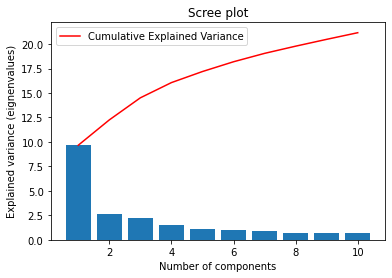

[0.46971643 0.10299709 0.07647023 0.06502338]


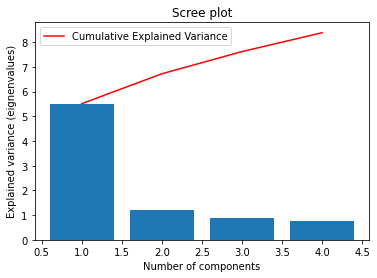

[0.52539673 0.06468644 0.05491584 0.03745144 0.03070701]


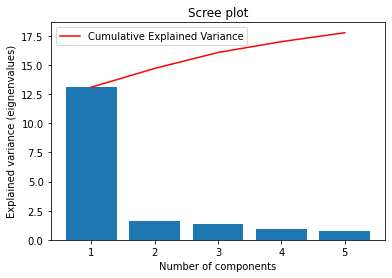

In [ ]:
for i in dfs:
    X = i.iloc[:,:-1]
    y = i.iloc[:,-1]
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    pca = PCA(0.70)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    print(pca.explained_variance_ratio_)
    plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
    plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
    plt.legend(loc='upper left')
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance (eignenvalues)')
    plt.title('Scree plot')
 
    plt.show()

### PCA - FEATURES SELECTION AND MODELS ACCURACY 

In [13]:
def pca_ds_acc(dfs,dfs_names,data,num_feat):
    for i in range(len(dfs)):
        
        X = dfs[i].iloc[:,:-1]
        y = dfs[i].iloc[:,-1]
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        pca = PCA(0.70)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        n_pcs= pca.components_.shape[0]
        pca_comp = [abs(pca.components_[x]) for x in range(n_pcs)]
        pca_comp = [list(pca_comp[l]) for l in range(n_pcs)]
        pca_comp_sort = [sorted(pca_comp[p])[-3:] for p in range(n_pcs)]

        most_important_index = []
        for k in range(len(pca_comp_sort)):
          for j in range(len(pca_comp_sort[k])):
            most_important_index.append(pca_comp[k].index(pca_comp_sort[k][j]))
        
        initial_feature_names = dfs[i].columns
        most_important_index = list(set(most_important_index))
        most_important_names = [initial_feature_names[most_important_index[q]] for q in range(len(most_important_index))]

        sub_col = list(most_important_names)
        sub_col.append("CONDITION")
        df_5 = dfs[i][sub_col] 
        print(dfs_names[i])
        print(most_important_index)

        X_sub = df_5.iloc[:,:-1]
        y_sub = df_5.iloc[:,-1]
        X_sub_train, X_sub_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.3, random_state=42)

        # LOGISTIC REGRESSION
        lr = LogisticRegression(C=0.01, random_state=42)
        lr.fit(X_sub_train, y_train)
        y_lr_pred = lr.predict(X_sub_test)
        acc_lr = accuracy_score(y_test, y_lr_pred)
        #feture importance LR 
        importance_lg = pd.DataFrame(data={
            'Attribute': X_sub_train.columns,
            'Importance': lr.coef_[0]
        })
        

        # RANDOM FOREST
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_sub_train, y_train)
        y_rf_pred = rf.predict(X_sub_test)
        acc_rf = accuracy_score(y_test, y_rf_pred)
        #feture importance RF
        importances_rf = rf.feature_importances_
        importance_rf = pd.DataFrame(np.c_[X_sub_train.columns, rf.feature_importances_],
                  columns = ["Attribute", "Importance"]).sort_values("Importance", ascending = False)
        #SVM
        svm = LinearSVC(loss='hinge',random_state=42)
        svm.fit(X_sub_train, y_train)
        y_pred_svm = svm.predict(X_sub_test)
        acc_svm = accuracy_score(y_pred_svm,y_test)
        importances_svm = pd.DataFrame(data={
            'Attribute': X_sub_train.columns,
            'Importance_svm': svm.coef_[0]
        })
        importance_svm = importances_svm.sort_values(by='Importance_svm', ascending=False)
        merge1 = importance_lg.merge(importance_rf, left_index=True, right_index=True)
        importances_mod = merge1.merge(importance_svm, left_index=True, right_index=True)
        importances_mod = importances_mod.iloc[:,[0,1,3,5]]
        importances_mod.rename(columns = {'Attribute_x':'Feature',
                                          'Importance_x':'Logistic Regression',
                                          'Importance_y':'Random Forest',
                                          'Importance_svm':'SVM'},
                              inplace = True)
        importances_mod['Logistic Regression'] = importances_mod['Logistic Regression'].abs()
        importances_mod['SVM'] = importances_mod['SVM'].abs()

        importances_mod.set_index("Feature",drop=True,inplace=True)
        plt_imp = importances_mod.plot.bar()
        plt.title("Importance of selected features")
        plt.xlabel("Features")
        plt.xticks(rotation='vertical', horizontalalignment="center")
        plt.show()
        data[dfs_names[i]] = [acc_lr,acc_rf, acc_svm]
        num_feat[dfs_names[i]] = [df_5.shape[1]-1]

        
    return data

BF_df_CTU
[1, 2, 3, 4, 5, 6, 7]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-13-d9eb987407a0>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importances_mod['Logistic Regression'] = importances_mod['Logistic Regression'].abs()
<ipython-input-13-d9eb987407a0>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy

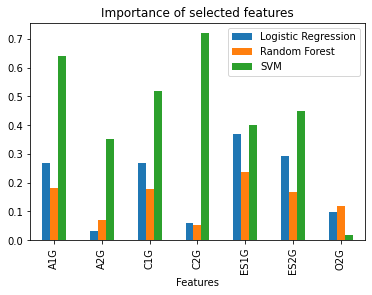

BF_df_OU
[1, 2, 3, 4, 5, 6, 7, 8]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


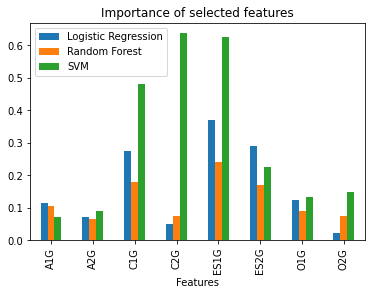

BF_df_V
[1, 2, 3, 4, 5, 6, 7, 8]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


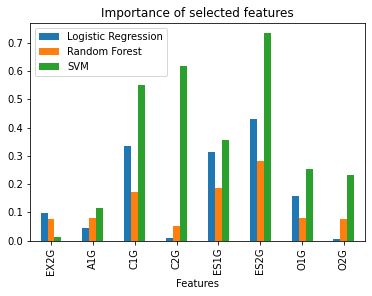

DT_df_CC
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 15, 16, 17]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


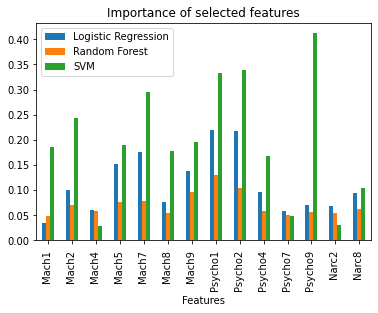

DT_df_JI
[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


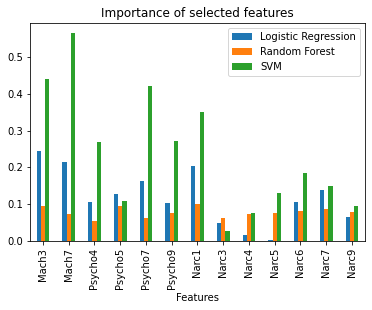

IADQ_df
[1, 6, 7]


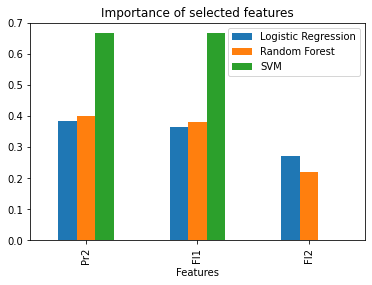

IESR_df
[3, 7, 9, 14, 15, 17]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


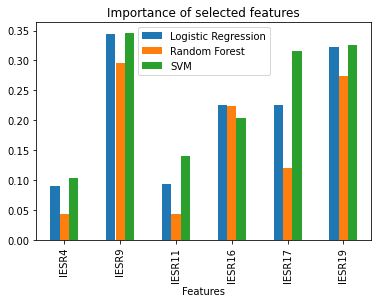

NAQ_R_df
[8, 19, 12]


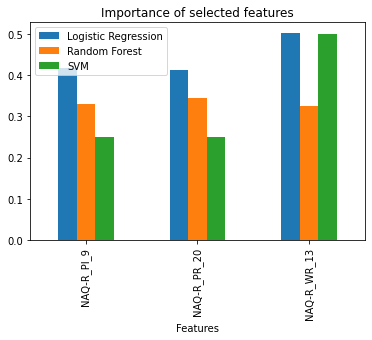

PCL5_df
[1, 3, 4, 10, 12, 15]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


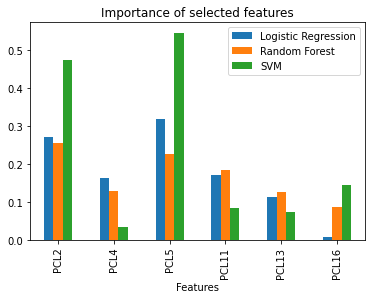

PHQ9_GAD7_df
[0, 1, 6, 7, 8, 11, 12, 13, 14]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


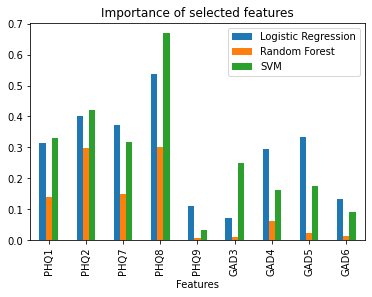

PID5_df
[129, 5, 6, 7, 136, 10, 13, 145, 25, 27, 28, 31, 163, 164, 36, 166, 35, 167, 170, 47, 178, 182, 184, 60, 189, 62, 69, 71, 200, 201, 203, 76, 209, 86, 87, 88, 90, 91, 92, 93, 95, 96, 97, 102, 112, 113, 114, 124, 127]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


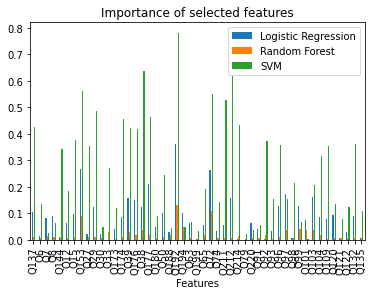

PRFQ_df
[0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


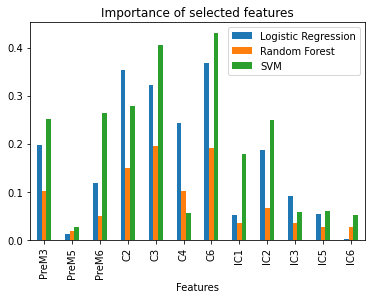

PRMQ_df
[0, 1, 2, 5, 7, 8, 10, 11, 15]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


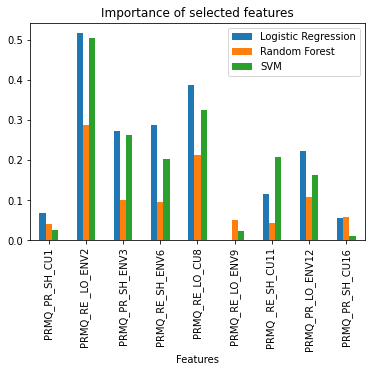

R_NEO_PI
[1, 2, 4, 5, 6, 7, 8, 11, 12, 14, 21, 24, 25, 27, 28, 29]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


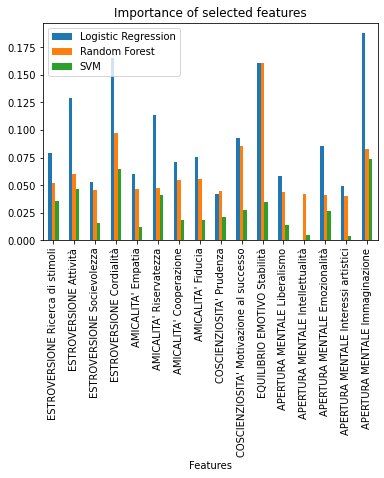

RAW_DDDT
[0, 1, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


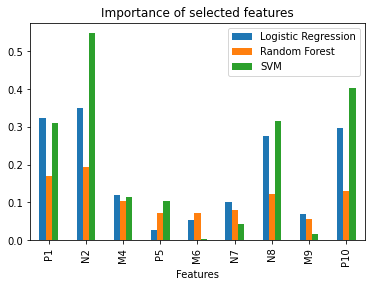

sPID-5_df
[3, 4, 5, 7, 8, 9, 12, 13, 15, 18, 20, 23]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


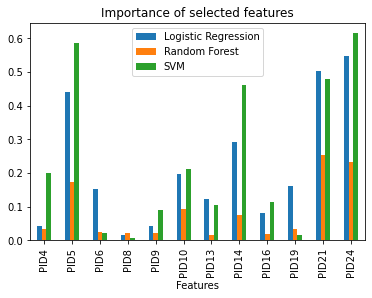

{'BF_df_CTU': [0.7969924812030075, 0.8270676691729323, 0.8120300751879699], 'BF_df_OU': [0.8260869565217391, 0.8188405797101449, 0.7971014492753623], 'BF_df_V': [0.7534246575342466, 0.773972602739726, 0.7808219178082192], 'DT_df_CC': [0.6827586206896552, 0.7310344827586207, 0.7241379310344828], 'DT_df_JI': [0.6346153846153846, 0.6, 0.6615384615384615], 'IADQ_df': [0.8518518518518519, 0.8592592592592593, 0.8592592592592593], 'IESR_df': [0.9444444444444444, 0.9259259259259259, 0.9351851851851852], 'NAQ_R_df': [0.9672897196261683, 0.9485981308411215, 0.9626168224299065], 'PCL5_df': [0.8016528925619835, 0.7933884297520661, 0.8264462809917356], 'PHQ9_GAD7_df': [0.9851190476190477, 0.9761904761904762, 0.9910714285714286], 'PID5_df': [0.9314516129032258, 0.9395161290322581, 0.8951612903225806], 'PRFQ_df': [0.9068627450980392, 0.9264705882352942, 0.9264705882352942], 'PRMQ_df': [0.8981042654028436, 0.919431279620853, 0.8981042654028436], 'R_NEO_PI': [0.9031621401295749, 0.9121723087484447, 0.9

In [14]:
data = {}
num_feat = {}
results_acc = pca_ds_acc(dfs,dfs_names,data, num_feat)
print(results_acc)

In [ ]:
acc_df = pd.DataFrame(results_acc)
mean_acc_df_complete = acc_df_complete.mean()
mean_acc_df = acc_df.mean()
diff = mean_acc_df - mean_acc_df_complete
X_axis = np.arange(len(dfs_names))
std_acc = acc_df.std()

In [ ]:
'''''''''''
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.bar(X_axis, mean_acc_df,0.4, yerr = std_acc)
plt.xticks(X_axis, dfs_names, rotation=90)
plt.show()
'''''''''''

### SUMMARY TABLE

In [ ]:
Name = dfs_names

Sample_size = []
Number_features = []
for a in dfs_2:
    Sample_size.append(a.shape[0])
    Number_features.append(a.shape[1]-1)

num_feat_list= list(num_feat.values())
Selected_features = []
for b in num_feat_list:
    for c in b:
        Selected_features.append(c)

Avg_acc_all_features = list(round(mean_acc_df_complete,3))        

Accuracy_logistic = list(round(acc_df.iloc[0,:],3))

Accuracy_RF = list(round(acc_df.iloc[1,:],3))

Accuracy_SVM = list(round(acc_df.iloc[2,:],3))

Avg_acc_sel_features = list(round(mean_acc_df,3))

Std_sel_features = list(round(std_acc, 3))

Acc_diff = list(round(diff, 3))

In [ ]:
Summary_pca = pd.DataFrame(list(zip(Name, Sample_size, Number_features, Selected_features, Avg_acc_all_features, Accuracy_logistic, Accuracy_RF, Accuracy_SVM, Avg_acc_sel_features, Std_sel_features, Acc_diff)),
               columns =['Dataset name', 'Sample size', 'Number of Features', 'Selected Features', 'Avg Acc. on all features', 'Accuracy - Logistic', 'Accuracy - RF', 'Accuracy - SVM', 'Avg Acc. on selected features', 'Accuracy Std on selected features', 'Acc. SF - Acc. AF'])
Summary_pca

,Dataset name,Sample size,Number of Features,Selected Features,Avg Acc. on all features,Accuracy - Logistic,Accuracy - RF,Accuracy - SVM,Avg Acc. on selected features,Accuracy Std on selected features,Acc. SF - Acc. AF
0,BF_df_CTU,442,10,7,0.810,0.812,0.827,0.767,0.802,0.031,-0.008
1,BF_df_OU,460,10,8,0.848,0.819,0.833,0.790,0.814,0.022,-0.034
2,BF_df_V,486,10,7,0.740,0.753,0.733,0.733,0.740,0.012,0.000
3,DT_df_CC,482,27,13,0.710,0.690,0.738,0.738,0.722,0.028,0.011
4,DT_df_JI,864,27,12,0.645,0.631,0.638,0.615,0.628,0.012,-0.017
5,IADQ_df,450,9,3,0.832,0.852,0.844,0.844,0.847,0.004,0.015
6,IESR_df,358,22,3,0.923,0.917,0.889,0.917,0.907,0.016,-0.015
7,NAQ_R_df,712,22,3,0.969,0.972,0.972,0.972,0.972,0.000,0.003
8,PCL5_df,402,20,5,0.843,0.793,0.777,0.835,0.802,0.030,-0.041
9,PHQ9_GAD7_df,1118,16,6,0.985,0.976,0.970,0.976,0.974,0.003,-0.011


### SUMMARY GRAPHS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def accuracy_barplot(data, prefix, save = False):
    """
    Parameters
    ----------
    
    data : pd.DataFrame
    save : bool
    prefix : str
    """
    plt.figure(figsize = (18, 7))
    plt.bar(x = data.sort_values("Avg Acc. on selected features",
                                 ascending = False)["Dataset name"],
            height = data.sort_values("Avg Acc. on selected features",
                                      ascending = False)["Avg Acc. on selected features"],
            yerr = data.sort_values("Avg Acc. on selected features",
                                    ascending = False)["Accuracy Std on selected features"], alpha = .7)
    plt.xticks(rotation = 35, fontsize = 13)
    plt.yticks(fontsize = 12)
    plt.ylabel("Accuracy\n(mean ± std)", fontsize = 13, rotation = 0, labelpad = 50)
    plt.title("Accuracy on different datasets", fontsize = 18)
    
    if save == True:
        plt.savefig(f".\\images\\{prefix}_accuracy_barplot.jpg", dpi = 300)
    else:
        plt.show()
        

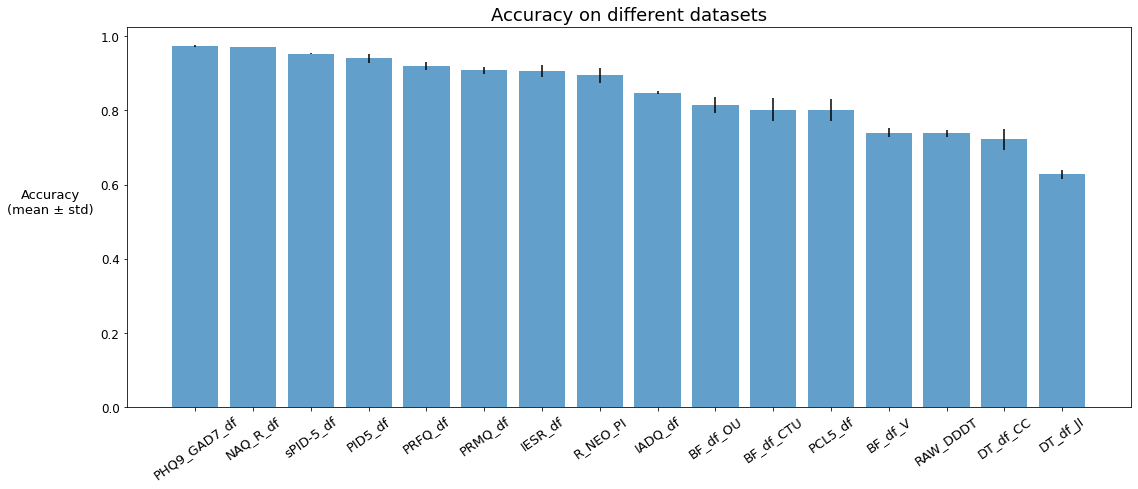

In [ ]:
accuracy_barplot(Summary_pca, "PCA", save = False)

In [ ]:
def accuracy_std(data, prefix, save = False):
    """
    Parameters
    ----------
    
    data : pd.DataFrame
    save : bool
    prefix : str
    """
    plt.figure(figsize = (18, 6))
    plt.bar(x = data.sort_values("Accuracy Std on selected features",
                                 ascending = False)["Dataset name"],
            height = data.sort_values("Accuracy Std on selected features",
                                      ascending = False)["Accuracy Std on selected features"], alpha = .7)
    plt.xticks(rotation = 35, fontsize = 13)
    plt.yticks(fontsize = 12)
    plt.ylabel("Stand. Dev.", fontsize = 13, rotation = 0, labelpad = 30)
    plt.title("Standard Deviation of Accuracies on different datasets", fontsize = 18)
    if save == True:
        plt.savefig(f".\\images\\{prefix}_accuracy_std.jpg", dpi = 300)
    else:
        plt.show()

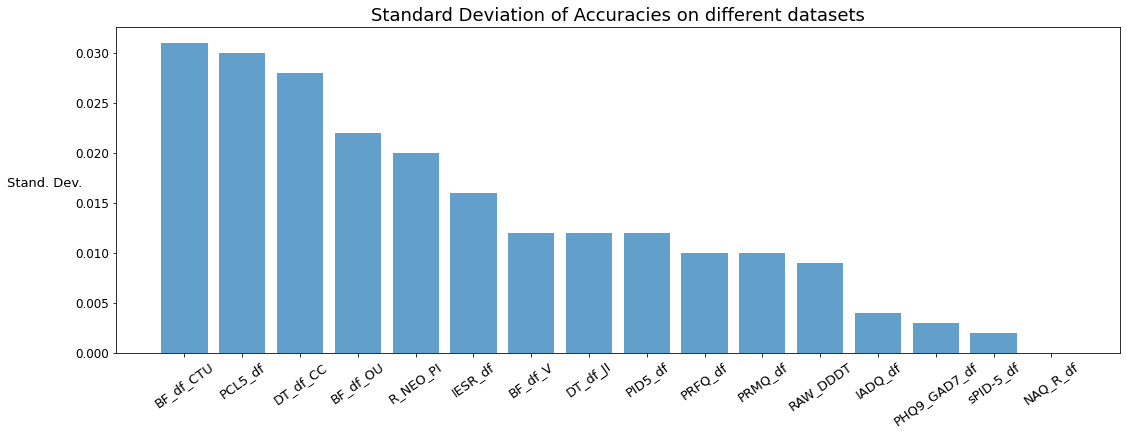

In [ ]:
accuracy_std(Summary_pca, "PCA", save = False)

In [ ]:
def faking_type_comparison(data, prefix, save = False):
    
    data_use = data.copy()
    faking_type = {"BF_df_CTU":"FAKING GOOD",
                   "BF_df_OU":"FAKING GOOD",
                   "BF_df_V":"FAKING GOOD",
                   "DT_df_CC":"FAKING GOOD",
                   "DT_df_JI":"FAKING GOOD",
                   "IADQ_df":"FAKING BAD",
                   "IESR_df":"FAKING BAD",
                   "NAQ_R_df":"FAKING BAD",
                   "PCL5_df":"FAKING BAD",
                   "PHQ9_GAD7_df":"FAKING BAD",
                   "PID5_df":"FAKING BAD",
                   "PRFQ_df":"FAKING GOOD",
                   "PRMQ_df":"FAKING BAD",
                   "RAW_DDDT":"FAKING BAD",
                   "R_NEO_PI":"FAKING GOOD",
                   "sPID-5_df":"FAKING GOOD"}
    
    data_use["Faking Type"] = data_use["Dataset name"].map(faking_type)
    
    figft, axft = plt.subplots(2, 1, figsize = (18, 10))
    
    for n, ftp in enumerate(data_use["Faking Type"].unique()):
        
    
        data_use[data_use["Faking Type"] == ftp].sort_values("Avg Acc. on all features",
                                                             ascending = False).plot(x = "Dataset name",
                                                                                     y = ["Avg Acc. on all features",
                                                                                          "Accuracy - Logistic", 
                                                                                          "Accuracy - RF", 
                                                                                          "Accuracy - SVM"],
                                                                                     kind = "bar", rot = 0,
                                                                                     ax = axft[n], title = ftp)
        axft[n].axhline(data_use[data_use["Faking Type"] == ftp]\
                        ["Avg Acc. on selected features"].mean(), ls = "--", color = "grey")
    
    if save == True:
        plt.savefig(f".\\images\\{prefix}faking_type_comparison.jpg", dpi = 300)
    else:
        plt.show()

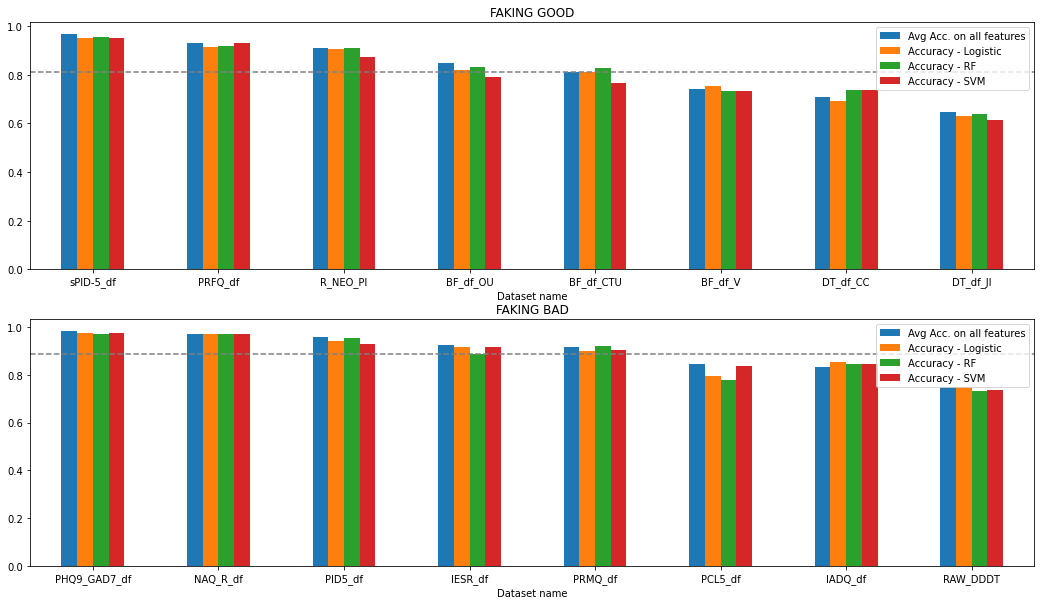

In [ ]:
faking_type_comparison(Summary_pca, "PCA", save = False)